#Probability Density Functions (PDFs)

Plotting Probability Density Functions using scipy, numpy, and matplotlib


##Gaussian (Normal) Probability Density Function

Plotting PDF, generating 10,000 numbers and plotting a histogram of the random numbers

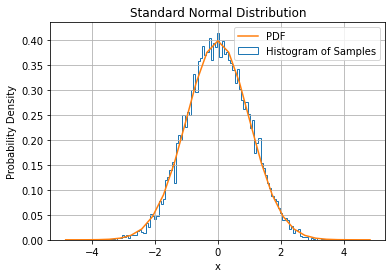

In [ ]:
#normal distribution + histogram

import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

# Sample from a normal distribution using numpy's random number generator
mu=0
sigma=1
samples = np.random.normal(mu, sigma,size=10000)

# Compute a histogram of the sample
bins1 = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(samples, bins=bins1, density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])

# Compute the PDF on the bin centers from scipy distribution object

pdf = stats.norm.pdf(bin_centers)


plt.figure(figsize=(6, 4))
plt.hist(samples,bins=100,density=True,histtype='step',
         label="Histogram of Samples")

plt.plot(bin_centers, pdf, label="PDF")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.title("Standard Normal Distribution")
plt.grid()
plt.legend()

plt.show()

#plt.savefig("NormalDis1.png")

##Poisson Probability Mass Function

Plotting PDF, generating 10,000 numbers and plotting a histogram of the random numbers


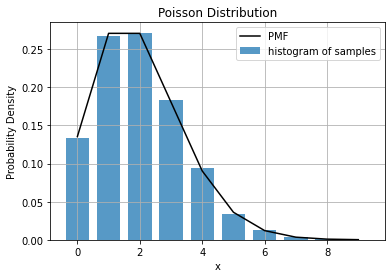

In [ ]:
#poisson example +histogram
import scipy.stats as stats
from matplotlib import pyplot as plt

mu=2

poisson = stats.poisson(mu)
poisson_sample = poisson.rvs(size=10000,random_state=143)

#making sure that the poisson ends because it is discrete
end = np.max(poisson_sample)+1
t=np.arange(0,end)

#plotting
plt.hist(poisson_sample, bins=end,range=(0,end), density=True,align='left',
         rwidth=0.75,label="histogram of samples", alpha=0.75)
plt.plot(t,poisson.pmf(t),label="PMF",color="Black")
plt.title("Poisson Distribution")
plt.ylabel("Probability Density")
plt.xlabel("x")
plt.legend()
plt.grid()
#plt.savefig("poisson_hist_pmf.png")
plt.show()


##Log-normal Probability Density Function

Plotting PDF, generating 10,000 numbers and plotting a histogram of the random numbers


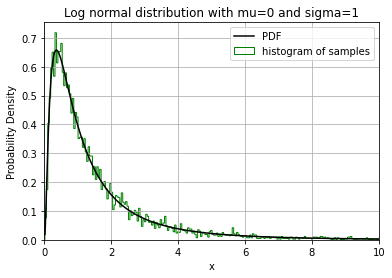

<Figure size 432x288 with 0 Axes>

In [ ]:
#log normal example +histogram

# mean and standard deviation
mu=0
sigma=1 

s = np.random.lognormal(mu, sigma, 10000)
  
# depict illustration
count, bins, ignored = plt.hist(s, 1000,density=True, histtype='step',
                                color='green', label="histogram of samples")
x = np.linspace(min(bins), max(bins), 10000)
  
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
       / (x * sigma * np.sqrt(2 * np.pi)))
  
# assign other attributes
plt.plot(x, pdf, color='black', label="PDF")
plt.grid()
plt.title("Log normal distribution with mu=0 and sigma=1")
plt.xlim([0,10])
plt.ylabel("Probability Density")
plt.xlabel("x")
plt.legend()

plt.show()

plt.savefig("lognormal_hist_pdf.png")

#Classical Confidence Intervals/Monte Carlo Simulation

Construct classical confidence intervals per Feldman-Cousins paper




Here is the formula for calculating confidence intervals for a normal distribution ...

$$CI = \bar{x} \pm Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}$$

where ...
- $CI$ = the confidence interval
- $\bar{x}$ = the mean of the sample 
- $Z_{\alpha/2}$ = the z-score for the required confidence interval e.g. 95% confidence = 1.96 z-score
- $\sigma$ = the standard distribution of the sample
- $n$ = the sample size

Given an observation from a Poisson distribution,

* the number of events counted is n.
* the mean (𝜆) and variance (𝜎2) are equal.

* The estimate for the mean is 𝜆̂ =𝑛≈𝜆
assuming the number of events is big enough (𝑛>20), the standard error is the standard deviation 𝜎, which we can also estimate:

𝑠𝑡𝑑𝑒𝑟𝑟= 𝜎 = √𝜆 ≈ √𝑛




---



In [ ]:
#Confidence interval from a SINGLE draw from a normal dis with a mean mu and std deviation sigma
#stats.norm.interval(0.90, loc=mu, scale=sigma)

#Confidence interval for the MEAN of N DRAWS from a normal dis with a mean mu and std deviation signma
#stats.norm.interval(0.68, loc=mu, scale=sigma/sqrt(N))

##Confidence Belts using ISF and PPF

the total amount of normal distributed data N is 10000
the amount of data in the tail is 250 points or 2.5 % of total
250
The most extreme 'low' value is -3.872866690343245, and the 250th value is -1.915242542807923
The most extreme 'high' value is 3.8322455042934296, and the 9750th value is 1.9708870917595769


(array([  1.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   2.,   0.,   4.,
          2.,   5.,   4.,   4.,   5.,  10.,   8.,  17.,  24.,  16.,  21.,
         22.,  33.,  45.,  40.,  48.,  87.,  77.,  93.,  94., 104., 121.,
        117., 141., 146., 145., 199., 218., 196., 240., 233., 242., 262.,
        272., 312., 306., 306., 283., 285., 328., 314., 321., 329., 270.,
        289., 262., 283., 262., 231., 240., 231., 208., 195., 168., 147.,
        137., 109., 104., 114.,  94.,  77.,  72.,  65.,  66.,  49.,  42.,
         37.,  38.,  23.,  18.,  13.,   9.,   4.,  15.,   9.,   4.,   4.,
          6.,   5.,   4.,   3.,   1.,   2.,   0.,   2.,   0.,   0.,   2.,
          1.]),
 array([-3.87286669, -3.79581557, -3.71876445, -3.64171332, -3.5646622 ,
        -3.48761108, -3.41055996, -3.33350884, -3.25645771, -3.17940659,
        -3.10235547, -3.02530435, -2.94825323, -2.87120211, -2.79415098,
        -2.71709986, -2.64004874, -2.56299762, -2.4859465 , -2.40889537,
        -2.33184425, -2.25

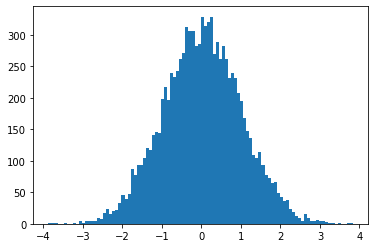

In [ ]:
#computing x0 and x1 for a confidence interval for a random data set 


import numpy as np


data = np.random.normal(0,1,10000)
sorted_data = np.sort(data)

N=len(data)

CL = 0.95
#confidence = (1-CL)*N
#round((1-CL)*N/2)

N_in_tail = int((1-CL)*N/2)
tail_perc_of_total = 100 * (N_in_tail / N)
print("the total amount of normal distributed data N is {}".format(N))
print("the amount of data in the tail is {} points or {} % of total".format(N_in_tail,
                                                                            tail_perc_of_total))
print(N_in_tail)

x0 = sorted_data[N_in_tail]
x1 = sorted_data[N-(1+N_in_tail)]

print("The most extreme 'low' value is {}, and the {}th value is {}".format(sorted_data[0],
                                                                            N_in_tail,
                                                                            x0))
N_head_index = N - N_in_tail # because confidence interval centered around 0
print("The most extreme 'high' value is {}, and the {}th value is {}".format(sorted_data[-1],
                                                                            N_head_index,
                                                                            x1))

plt.figure(figsize=(6, 4))
plt.hist(sorted_data, bins=100)

###Lognormal 

([0.19304081669873652,
  1.1930408166987365,
  2.1930408166987365,
  3.1930408166987365,
  4.193040816698737,
  5.193040816698737,
  6.193040816698737],
 [5.180251602233013,
  6.180251602233013,
  7.180251602233013,
  8.180251602233014,
  9.180251602233014,
  10.180251602233014,
  11.180251602233014])

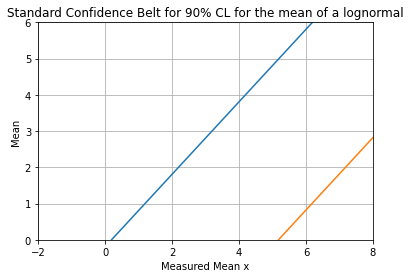

In [ ]:
#Confidence Belt for Lognormal with isf and ppf
import scipy
from scipy.stats import lognorm
from matplotlib import pyplot as plt

alpha =0.90
prob_in_tail = (1-alpha)/2
s=1
yy_mean = [0,1,2,3,4,5,6]
x0_m = []
x1_m = []

for y in yy_mean:
    x0_m.append(sp.lognorm.ppf(prob_in_tail, s, loc=y))
    x1_m.append(sp.lognorm.isf(prob_in_tail, s, loc=y))

plt.plot(x0_m,yy_mean)
plt.plot(x1_m,yy_mean)
plt.xlim(-2,8)
plt.ylim(0,6)
plt.grid()
plt.title("Standard Confidence Belt for 90% CL for the mean of a lognormal")
plt.xlabel("Measured Mean x")
plt.ylabel("Mean")

x0_m, x1_m

###Gaussian

Text(0, 0.5, 'Signal Mean')

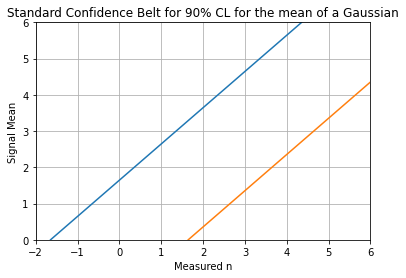

In [ ]:
# gaussian ppf isf 
import scipy as sp
from scipy.stats import norm
from matplotlib import pyplot as plt
alpha =0.90
prob_in_tail = (1-alpha)/2
prob_in_tail2 = (1-alpha)/2

y_mean = [0,1,2,3,4,5,6]
x0_l = []
x1_l = []
for y in y_mean:
    this_mean = y # accounts for background
    x0_l.append(sp.stats.norm(this_mean).ppf(prob_in_tail))
    x1_l.append(sp.stats.norm(this_mean).isf(prob_in_tail2))
    

plt.plot(x0_l,y_mean)
plt.plot(x1_l,y_mean)
plt.xlim(-2,6)
plt.ylim(0,6)
#plt.fill_between()
plt.grid()
plt.title("Standard Confidence Belt for 90% CL for the mean of a Gaussian")
plt.xlabel("Measured n")
plt.ylabel("Signal Mean")


###Poisson

Text(0, 0.5, 'Signal Mean')

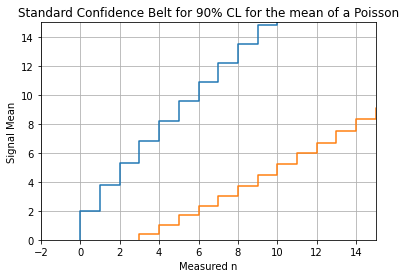

In [ ]:
# confidence belt for poisson
import scipy as sp
from scipy.stats import norm
from matplotlib import pyplot as plt
alpha =0.90
prob_in_tail = (1-alpha)/2
prob_in_tail2 = (1-alpha)/2
b = 1

y_means = np.arange(0,15.1,.1)

x0_p = []
x1_p = []
for y in y_means:
    this_mean = y + b # accounts for background
    x0_p.append(sp.stats.poisson(this_mean).ppf(prob_in_tail))
    x1_p.append(sp.stats.poisson(this_mean).isf(prob_in_tail2))
    

plt.step(x0_p,y_means)
plt.step(x1_p,y_means)
plt.xlim(-2,15)
plt.ylim(0,15)
plt.grid()
plt.title("Standard Confidence Belt for 90% CL for the mean of a Poisson")
plt.xlabel("Measured n")
plt.ylabel("Signal Mean")


In [ ]:

plt.grid(np.linspace(0,15,16)
np.arange(0,15.1,0.1)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ])

---


## Confidence belts using Monte Carlo

### Gaussian

Text(0, 0.5, 'Mean')

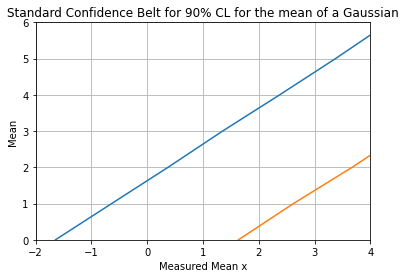

In [ ]:
#confidence levels for gaussian with Monte Carlo


import numpy as np
from matplotlib import pyplot as plt

CL = 0.90

mean = [0,1,2,3,4,5,6]
x0 = []
x1 = []

for i in mean:
    data = np.random.normal(i,1,10000)
    sorted_data = np.sort(data)
    N=len(data)
    N_in_tail = int((1-CL)*N/2)
    x0.append(sorted_data[N_in_tail])
    x1.append(sorted_data[N-(1+N_in_tail)])

x00= np.array(x0)
x11 =np.array(x1)
y = np.array([0,1,2,3,4,5,6])

plt.plot(x00, y)
plt.plot(x11, y)
plt.xlim(-2,4 )
plt.ylim(0,6)
plt.grid()
plt.title("Standard Confidence Belt for 90% CL for the mean of a Gaussian")
plt.xlabel("Measured Mean x")
plt.ylabel("Mean")


### Lognormal

Text(0, 0.5, 'Mean')

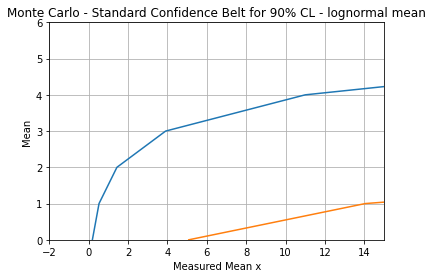

In [ ]:
#confidence belt for lognormal with monte carlo

import numpy as np
from matplotlib import pyplot as plt
from numpy import exp
CL = 0.90

mean = [0,1,2,3,4,5,6]
sigma = 1
x0 = []
x1 = []
#sigma1 = np.std(np.log(1))

for i in mean:
    data = np.random.lognormal(i,1,size=10000)
    sorted_data = np.sort(data)
    N=len(sorted_data)
    N_in_tail = int((1-CL)*N/2)
    # something needs to be changed below
    x0.append(sorted_data[N_in_tail])
    x1.append(sorted_data[N-(1+N_in_tail)])

x00= np.array(x0)
x11 =np.array(x1)
y = np.array(mean)

plt.plot(x00, y)
plt.plot(x11, y)
plt.xlim(-2,15)
plt.ylim(0,6)
plt.grid()
plt.title("Monte Carlo - Standard Confidence Belt for 90% CL - lognormal mean")
plt.xlabel("Measured Mean x")
plt.ylabel("Mean")


(array([2.412e+03, 2.521e+03, 1.598e+03, 1.001e+03, 6.250e+02, 4.650e+02,
        3.140e+02, 2.260e+02, 1.760e+02, 1.330e+02, 8.800e+01, 7.400e+01,
        5.400e+01, 5.800e+01, 3.600e+01, 3.000e+01, 2.600e+01, 1.900e+01,
        2.300e+01, 1.600e+01, 1.300e+01, 1.200e+01, 8.000e+00, 7.000e+00,
        9.000e+00, 4.000e+00, 7.000e+00, 6.000e+00, 2.000e+00, 4.000e+00,
        2.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

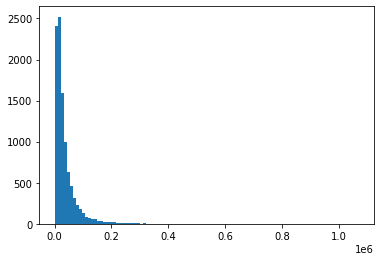

In [ ]:
import numpy as np
from matplotlib import pyplot as plt


lognorm1 = np.random.lognormal(mean=10, sigma=1, size =10000)

plt.hist(lognorm1,bins=100)

###Poisson

Text(0, 0.5, 'Signal Mean')

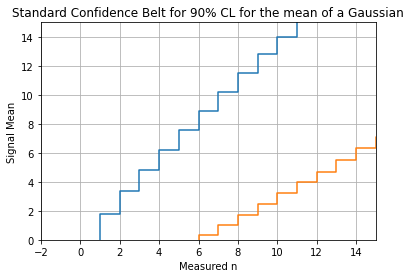

In [ ]:
#confidence levels for Poisson with Monte Carlo


import numpy as np
from matplotlib import pyplot as plt

CL = 0.90

#mean = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

mean = np.arange(0,15.1, .1)
x0 = []
x1 = []

for i in mean:
    this_mean = i + 3 # accounts for background
    data = np.random.poisson(this_mean,1000000)
    sorted_data = np.sort(data)
    N=len(data)
    N_in_tail = int((1-CL)*N/2)
    x0.append(sorted_data[N_in_tail])
    x1.append(sorted_data[N-(1+N_in_tail)])

x00= np.array(x0)
x11 =np.array(x1)
#y = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

plt.step(x00, mean)
plt.step(x11, mean)
plt.xlim(-2,15 )
plt.ylim(0,15)
plt.grid()
plt.title("Standard Confidence Belt for 90% CL for the mean of a Gaussian")
plt.xlabel("Measured n")
plt.ylabel("Signal Mean")


#Trying other Plotting Exercises

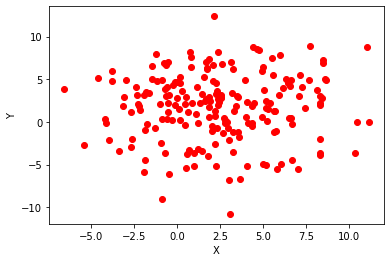

In [ ]:
#Scatter plot of normal distribution w mean=2 sigma=4


import matplotlib.pyplot as plt

X = np.random.normal(2,4,200)
Y= np.random.normal(2,4,200)
plt.scatter(X,Y, color='r')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
# looking at plotly

! pip install plotly==4.14.3

     |████████████████████████████████| 13.2MB 274kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:

import plotly.express as px
import pandas as pd
from scipy.stats import norm


norm_data_creator = norm() # instantiate norm object
data_size = 10000
data_normal_v2 = norm_data_creator.rvs(size=data_size, random_state=42)

data_df = pd.Series(data_normal_v2, name="Generated Data Value") # put in pandas series
fig_plotly = px.histogram(data_df, x="Generated Data Value", nbins=100, 
                          histnorm='probability density',
                          title="Plotly Visualization of Probability Distribution")
fig_plotly.show()



#Evaluating Numerical Integrals


In [ ]:
import scipy.integrate as integrate
from numpy import exp

integrate.quad(lambda x: x**2,0,1)
integrate.quad(lambda x: exp(x), 0,1)


(1.7182818284590453, 1.9076760487502457e-14)

In [ ]:
from numpy import trapz

def function(x):
    return np.cos(x)

xmin =0.0
xmax = 9.0*(np.pi /2.0)

integrate.quad(function,xmin,xmax)

NameError: ignored

In [ ]:
def f(x):
    return np.random.normal(mean,sigma,10000)*exp(-()**2/2)

integrate.quad(lambda x: f(x), 0, inf)



Text(0.5, 1.0, 'Estimated background of 3, signal of 5, uncertainty in background estimation of 1')

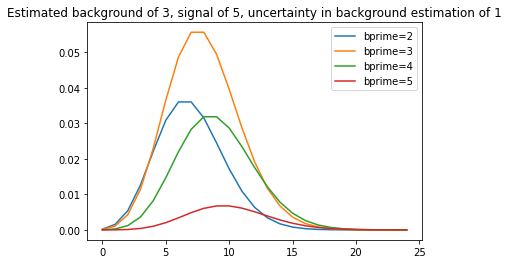

In [ ]:
#attempting to work through equation six
import math
import numpy as np
import scipy.stats 
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from numpy import inf

n = np.arange(0,25,1)
bprime = 2  # np.arange(0,20,1)
sigma_b = 1
s = 5
b =3


weights = 1/math.sqrt(2*math.pi*sigma_b)*np.exp(-(b-bprime)**2/(2*sigma_b**2))
p= scipy.stats.poisson.pmf(n, mu=s+bprime)
integrand = weights*p

fig, ax = plt.subplots()
ax.plot(n, integrand, label="bprime=2")


#######
bprime2 = 3  # np.arange(0,20,1)
sigma_b2 = 1
s2 = 5
b2 =3

weights2 = 1/math.sqrt(2*math.pi*sigma_b2)*np.exp(-(b2-bprime2)**2/(2*sigma_b2**2))
p2= scipy.stats.poisson.pmf(n, mu=s2+bprime2)
integrand2 = weights2*p2
ax.plot(n, integrand2, label="bprime=3")

#######
bprime3 = 4  # np.arange(0,20,1)
sigma_b3 = 1
s3 = 5
b3 =3

weights3 = 1/math.sqrt(2*math.pi*sigma_b3)*np.exp(-(b2-bprime3)**2/(2*sigma_b3**2))
p3= scipy.stats.poisson.pmf(n, mu= s3+ bprime3)
integrand3 = weights3*p3
ax.plot(n, integrand3, label="bprime=4")

#######
bprime4 = 5
sigma_b4 = 1
s4 = 5
b4 = 3

weights4 = 1/math.sqrt(2*math.pi*sigma_b4)*np.exp(-(b4-bprime4)**2/(2*sigma_b4**2))
p4 = scipy.stats.poisson.pmf(n, mu= s4+ bprime4)
integrand4 = weights4*p4
ax.plot(n, integrand4, label="bprime=5")

plt.legend()
plt.title("Estimated background of 3, signal of 5, uncertainty in background estimation of 1")
#integrate.quad(lambda bprime: integrand, 0, inf)

In [ ]:
n = np.arange(0,15.1,.1)
bprime = np.linspace(0,15,160)
sigma_b = 1
s = 5
b =3

weights = 1/(np.sqrt(2*math.pi*sigma_b))*np.exp(-(b-bprime)**2/(2*sigma_b**2))
p= scipy.stats.poisson.pmf(n, mu=s + bprime)
integrand = weights*p

#print(np.array([integrate(bprime) for b in bprime]))


integrate.quad(lambda bprime: integrand, 0, np.inf) 




ValueError: ignored